In [8]:
import numpy as np
import random
number=[]
for i in range(1000000):
  number.append(random.randint(1,6))
np.mean(number)

3.5052

In [4]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from mlxtend.data import boston_housing_data
from sklearn.model_selection import train_test_split
import pandas as pd

In [3]:
X,y=boston_housing_data()

In [4]:
lr=LinearRegression()

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=True,random_state=123)

In [6]:
avg_loss,avg_bias,var=bias_variance_decomp(lr,X_train,y_train,X_test,y_test,loss='mse',random_seed=123)

In [7]:
print(avg_loss,avg_bias,var)

29.891450216347607 28.609233801954336 1.2822164143932588


In [8]:
dt=DecisionTreeRegressor(random_state=123)
avg_loss,avg_bias,var=bias_variance_decomp(dt,X_train,y_train,X_test,y_test,loss='mse',random_seed=123)
print(avg_loss,avg_bias,var)

31.536008881578947 14.095801179276307 17.440207702302633


In [9]:
ploy=PolynomialFeatures(degree=2,include_bias=True)

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

def polynomial_regression(X_train, y_train, X_test, y_test,degree):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lr = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lr),
        ])
    polynomial_regression.fit(X_train, y_train)
    # y_newbig = polynomial_regression.predict(X_test)
    avg_loss,avg_bias,var=bias_variance_decomp(lr,X_train,y_train,X_test,y_test,loss='mse',random_seed=1)
    print(avg_loss,avg_bias,var)
polynomial_regression(X_train, y_train, X_test, y_test,7)

29.675415954444425 28.331914351267386 1.3435016031770273


#`Ridge regularization`

In [51]:
from sklearn.datasets import load_diabetes

In [54]:
X,y=load_diabetes(return_X_y=True)

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=45)

In [22]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
lr=LinearRegression()
model=lr.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(r2_score(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.5188113124539249
48.72713760953253


In [24]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=0.1)
model=R.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(r2_score(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.5208421054129915
48.62420568515607


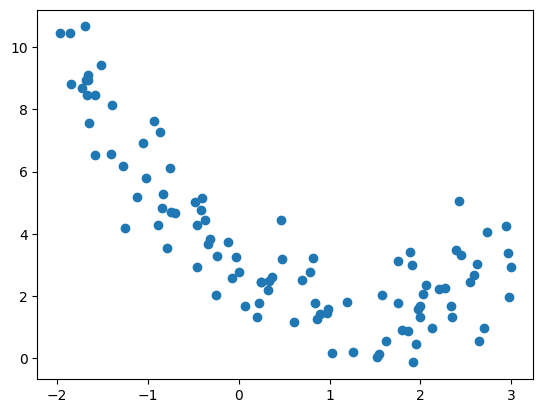

In [103]:
import matplotlib.pyplot as plt

m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.3259e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.20366e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.97198e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Alpha: 0
R² score: 0.8748
MSE: 0.8910

Alpha: 0.1
R² score: 0.8706
MSE: 0.9215

Alpha: 1
R² score: 0.8630
MSE: 0.9752

Alpha: 10
R² score: 0.8488
MSE: 1.0767



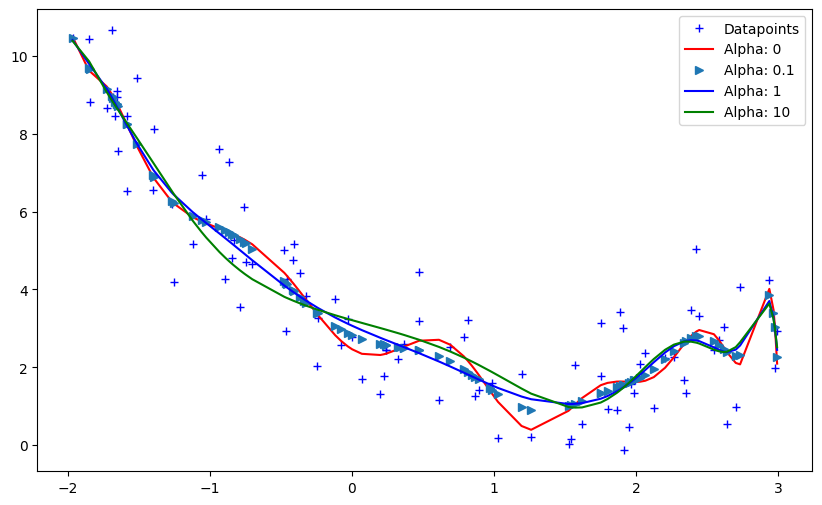

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

def get_preds_ridge(x1, x2, alpha):
    # Create a pipeline with polynomial features, scaling, and Ridge regression
    polybig_features = PolynomialFeatures(degree=16, include_bias=False)
    std_scaler = StandardScaler()
    lr = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("ridge_reg", Ridge(alpha=alpha))
    ])
    # Fit the pipeline to the data
    polynomial_regression.fit(x1, x2)
    # Make predictions
    return polynomial_regression.predict(x1)


# Plotting the results
alphas = [0, 0.1, 1, 10]
cs = ['r', '>', 'b','g']
plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')
for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))
    r2 = r2_score(x2, preds)
    mse = mean_squared_error(x2, preds)
    print(f"Alpha: {alpha}")
    print(f"R² score: {r2:.4f}")
    print(f"MSE: {mse:.4f}\n")
plt.legend()
plt.show()


#`Ridge reg. without inbuild library`

In [77]:
from sklearn.datasets import make_regression
X,y=make_regression(n_features=1,n_samples=100,n_informative=1,n_targets=1,noise=20,random_state=13)

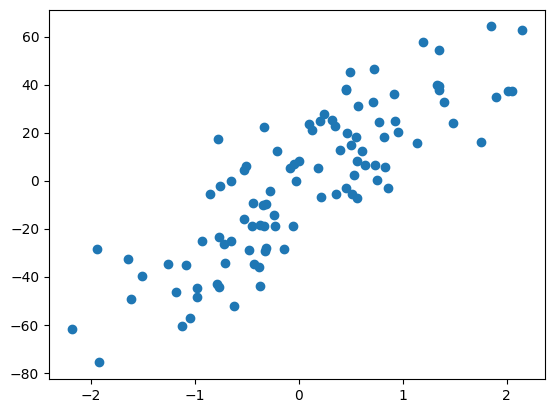

In [34]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [35]:
from sklearn.linear_model import LinearRegression, Ridge
lr=LinearRegression()
model=lr.fit(X,y)
print(model.coef_,model.intercept_)

[27.82809103] -2.29474455867698


In [36]:
lr=Ridge(alpha=10)
model2=lr.fit(X,y)
print(model2.coef_,model2.intercept_)

[24.9546267] -2.1269130035235735


In [37]:
lr=Ridge(alpha=100)
model3=lr.fit(X,y)
print(model3.coef_,model3.intercept_)

[12.93442104] -1.4248441496033308


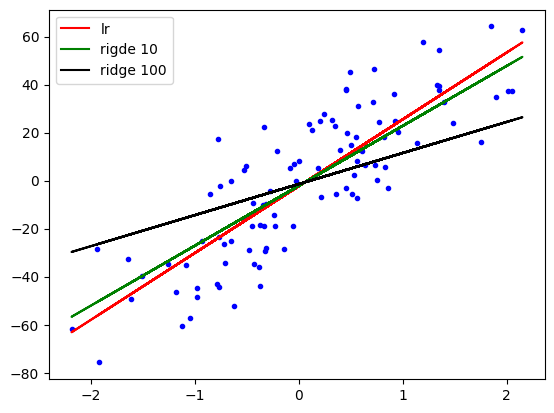

In [39]:
plt.plot(X,y,'b.')
plt.plot(X,model.predict(X),'red',label='lr')
plt.plot(X,model2.predict(X),'green',label='rigde 10')
plt.plot(X,model3.predict(X),'black',label='ridge 100')
plt.legend()
plt.show()

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True)

In [44]:
# X_train

In [58]:
import numpy as np

In [70]:
X_train.shape[0]

80

In [82]:
class mera_ridge:
  def __init__(self,alpha=0.1):
    self.alpha=alpha
    self.m=None
    self.b=None
  def fit(self,X_train,y_train):
    num=0
    den=0
    for i in range(len(X_train)):
      num += (y_train[i] - np.mean(y_train)) * (X_train[i] - np.mean(X_train))
      den += (X_train[i] - np.mean(X_train)) * (X_train[i] - np.mean(X_train))
    self.m=num/(den+ self.alpha )
    self.b=y_train.mean() - [(self.m)*np.mean(X_train)]
    print(self.m,self.b)
  def predict(self,X_test):
    return [self.m * x + self.b for x in X_test]

In [83]:
reg=mera_ridge(alpha=10)
reg.fit(X_train,y_train)
reg.predict(X_test)

[24.95635517] [[-1.37869913]]


[array([[35.52390732]]),
 array([[7.59391654]]),
 array([[21.63964903]]),
 array([[-9.41773152]]),
 array([[-2.81449783]]),
 array([[-10.76029119]]),
 array([[28.33696456]]),
 array([[-9.82937654]]),
 array([[-10.02874122]]),
 array([[-14.15548185]]),
 array([[-14.61373827]]),
 array([[-6.55339184]]),
 array([[8.5349965]]),
 array([[20.1139978]]),
 array([[45.85724793]]),
 array([[42.27600027]]),
 array([[16.63891727]]),
 array([[-25.93976514]]),
 array([[31.82116251]]),
 array([[-24.54656274]])]

In [87]:
lr=Ridge(alpha=100)
model2=lr.fit(X_train,y_train)
print(model2.coef_,model2.intercept_)
print(model2.predict(X_test))

[11.73379226] -1.4547797326472947
[ 15.89581153   2.76389753   9.3678149   -5.23451181  -2.12985282
  -5.86574646  12.51670858  -5.42805598  -5.52179177  -7.46207179
  -7.67753136  -3.88777802   3.20636747   8.65049562  20.75426426
  19.07046004   7.01660827 -13.0027179   14.15488269 -12.34767242]


In [86]:
reg=mera_ridge(alpha=100)
reg.fit(X_train,y_train)
reg.predict(X_test)

[11.73379226] [[-1.45477973]]


[array([[15.89581153]]),
 array([[2.76389753]]),
 array([[9.3678149]]),
 array([[-5.23451181]]),
 array([[-2.12985282]]),
 array([[-5.86574646]]),
 array([[12.51670858]]),
 array([[-5.42805598]]),
 array([[-5.52179177]]),
 array([[-7.46207179]]),
 array([[-7.67753136]]),
 array([[-3.88777802]]),
 array([[3.20636747]]),
 array([[8.65049562]]),
 array([[20.75426426]]),
 array([[19.07046004]]),
 array([[7.01660827]]),
 array([[-13.0027179]]),
 array([[14.15488269]]),
 array([[-12.34767242]])]

#`least square method with regularisation`

In [92]:
from sklearn.linear_model import LinearRegression, Ridge
reg=Ridge(alpha=0.1,solver='cholesky')
reg.fit(X_train,y_train)

Ridge(alpha=0.1, solver='cholesky')

In [93]:
y_pred=reg.predict(X_test)

In [96]:
print(r2_score(y_test,y_pred))

0.5208421054129915


In [97]:
print(reg.coef_,reg.intercept_)

[  31.03389163 -204.8305909   464.8963454   304.96414918  -95.76037039
  -87.52969228 -183.81809293  147.49794012  425.85392451  110.21559915] 152.07141290172817


In [108]:
class mera_ridge:
  def __init__(self,alpha=0.1):
    self.alpha=alpha
    self.m=None
    self.b=None
  def fit(self,X_train,y_train):
    X_train=np.insert(X_train,0,1,axis=1)
    I=np.identity(X_train.shape[1])
    I[0][0]=0
    result=np.linalg.inv(np.dot(X_train.T,X_train)+ self.alpha*I).dot(X_train.T).dot(y_train)
    self.b=result[0]
    self.m=result[1:]
    print(self.m,self.b)
  def predict(self,X_test):
    return np.dot(X_test,self.m)  + self.b

In [109]:
reg=mera_ridge(alpha=0.1)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
print(r2_score(y_test,y_pred))

[  31.03389163 -204.8305909   464.8963454   304.96414918  -95.76037039
  -87.52969228 -183.81809293  147.49794012  425.85392451  110.21559915] 152.0714129017282
0.5208421054129914


#`Gradient descent`

In [113]:
from sklearn.linear_model import SGDRegressor

In [136]:
sgd=SGDRegressor(penalty='l2',max_iter=500,alpha=0.001,learning_rate='constant',eta0=0.1)
sgd.fit(X_train,y_train)

SGDRegressor(alpha=0.001, eta0=0.1, learning_rate='constant', max_iter=500)

In [137]:
y_pred=sgd.predict(X_test)

In [138]:
print(r2_score(y_test,y_pred))

0.46471769619192127


In [118]:
print(sgd.coef_,sgd.intercept_)

[  38.00456697 -129.1948672   382.0985043   261.75018847  -29.34466174
  -77.10112678 -180.75892979  128.96104597  330.34083187  133.07228749] [156.19009057]


In [121]:
R=Ridge(alpha=0.001,max_iter=500,solver='sparse_cg')
R.fit(X_train,y_train)

Ridge(alpha=0.001, max_iter=500, solver='sparse_cg')

In [122]:
y_pred=R.predict(X_test)

In [123]:
print(r2_score(y_test,y_pred))

0.5201448363733796


In [124]:
print(R.coef_,R.intercept_)

[  24.01614157 -246.40604595  493.59285633  329.08832668 -852.76774004
  479.42466511  131.86683001  243.03291514  748.9646394    90.15507892] 152.12463295186845


In [128]:
class mera_ridgeGD:
  def __init__(self,alpha,epochs,learning_rate):
    self.alpha=alpha
    self.learning_rate=learning_rate
    self.epochs=epochs
    self.coef_=None
    self.intercept_=None
  def fit(self,X_train,y_train):
    self.coef_=np.ones(X_train.shape[1])
    self.intercept_=0
    thetha=np.insert(self.coef_,0,self.intercept_)
    X_train=np.insert(X_train,0,1,axis=1)
    for i in range(self.epochs):
      thetha_der=np.dot(X_train.T,X_train).dot(thetha)-np.dot(X_train.T ,y_train)-self.alpha*thetha
      thetha=thetha - self.learning_rate *thetha_der
    self.coef_=thetha[1:]
    self.intercept_=thetha[0]
    print(self.coef_,self.intercept_)
  def predict(self,X_test):
    return np.dot(X_test,self.coef_)  + self.intercept_

In [129]:
reg=mera_ridgeGD(alpha=0.001,epochs=500,learning_rate=0.005)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
print(r2_score(y_test,y_pred))

[  34.09918193 -187.12179954  467.74344312  306.33667093  -54.43177395
 -114.27189387 -209.55624487  140.8174027   398.13190277  140.50747476] 152.08275280418576
0.5154718700626673


#` How the coefficients get affected?(ridge reg.)`

In [19]:
from  sklearn.metrics import r2_score
from sklearn.linear_model import Ridge

In [43]:
coef=[]
r2_scores=[]
for i in [0.01,10,50,100,1000]:
  R=Ridge(alpha=i)
  model=R.fit(X_train,y_train)
  coef.append(model.coef_.tolist())
  y_pred=model.predict(X_test)
  r2=r2_score(y_test,y_pred)
  r2_scores.append(r2)

In [44]:
print("R^2 Scores:", r2_scores)
print("Coefficients:", coef)

R^2 Scores: [0.5230847087541541, 0.18324524136176967, 0.04876689816017399, 0.025224686457473333, 0.0022195569714815733]
Coefficients: [[26.261810516162058, -240.39934227098067, 496.5750797211092, 326.65998290403223, -420.98179086437887, 137.8918035754934, -53.056922373658686, 194.22314385406173, 581.450281715678, 94.3136928912817], [18.77788374216631, 0.3642318642636072, 64.21521327743177, 49.17553458778087, 14.439728699131193, 9.623398527005628, -40.539280425711105, 39.32153888472101, 59.20162297796032, 40.365252527446216], [4.842136490140435, 0.8679212449574533, 14.885747916789164, 11.623134785051704, 4.220197340111934, 3.238811665517465, -9.749634122333399, 9.877681880851407, 13.996624476881395, 9.95913710205229], [2.508376368577181, 0.49995431815727664, 7.600230830990706, 5.950702448506316, 2.2204241873620987, 1.7292726133773066, -5.003424088829651, 5.100126121517429, 7.167274538211894, 5.128501861892084], [0.2591788428746175, 0.05634256082527656, 0.7749139663174803, 0.608266752236

In [56]:
data = load_diabetes()
feature_names = data.feature_names
print("Feature Names:", feature_names)

Feature Names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


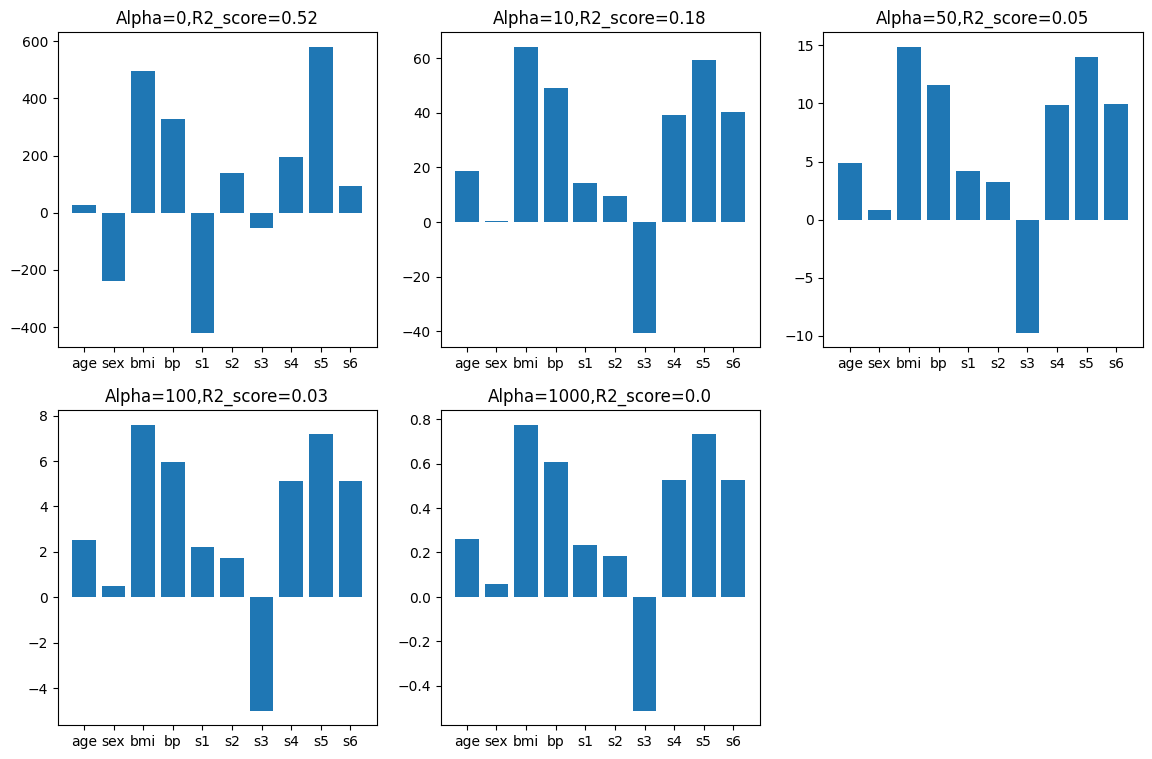

In [46]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(14,9))
plt.subplot(231)
plt.bar(feature_names,coef[0])
plt.title('Alpha=0,R2_score={}'.format(np.round(r2_scores[0],2)))

plt.subplot(232)
plt.bar(feature_names,coef[1])
plt.title('Alpha=10,R2_score={}'.format(np.round(r2_scores[1],2)))

plt.subplot(233)
plt.bar(feature_names,coef[2])
plt.title('Alpha=50,R2_score={}'.format(np.round(r2_scores[2],2)))

plt.subplot(234)
plt.bar(feature_names,coef[3])
plt.title('Alpha=100,R2_score={}'.format(np.round(r2_scores[3],2)))

plt.subplot(235)
plt.bar(feature_names,coef[4])
plt.title('Alpha=1000,R2_score={}'.format(np.round(r2_scores[4],2)))

plt.show()

#` Higher Values are impacted more`

In [86]:
coef=[]
for i in [0,0.0001,0.001,0.01,0.1,1,10,50,100,1000,10000]:
  R=Ridge(alpha=i)
  model=R.fit(X_train,y_train)
  coef.append(model.coef_.tolist())

In [87]:
input_arr=np.array(coef)
coef=pd.DataFrame(input_arr,columns =data.feature_names)
alphas=[0,0.0001,0.001,0.01,0.1,1,10,50,100,1000,10000]
coef['alpha']=alphas
coef.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,23.454654,-247.427474,492.108752,329.358764,-970.797230,573.542955,182.421624,255.921682,794.216093,89.322492
0.0001,23.517635,-247.317667,492.282449,329.331759,-957.463244,562.903103,176.710702,254.470333,789.108676,89.413758
0.0010,24.016144,-246.406044,493.592860,329.088330,-852.767736,479.424669,131.866827,243.032920,748.964644,90.155083
0.0100,26.261811,-240.399342,496.575080,326.659983,-420.981791,137.891804,-53.056922,194.223144,581.450282,94.313693
0.1000,31.033892,-204.830591,464.896345,304.964149,-95.760370,-87.529692,-183.818093,147.497940,425.853925,110.215599
1.0000,42.955098,-67.887067,280.270383,195.506087,0.015036,-30.813126,-145.767246,114.715808,243.273028,120.912940
10.0000,18.777884,0.364232,64.215213,49.175535,14.439729,9.623399,-40.539280,39.321539,59.201623,40.365253
50.0000,4.842136,0.867921,14.885748,11.623135,4.220197,3.238812,-9.749634,9.877682,13.996624,9.959137
100.0000,2.508376,0.499954,7.600231,5.950702,2.220424,1.729273,-5.003424,5.100126,7.167275,5.128502


In [94]:
coef=[]
for i in [0,0.0001,0.0005,0.001,0.05,0.1,0.5,1,5,10]:
  R=Ridge(alpha=i)
  model=R.fit(X_train,y_train)
  coef.append(model.coef_.tolist())

In [95]:
input_arr=np.array(coef)
coef=pd.DataFrame(input_arr,columns =data.feature_names)
alphas=[0,0.0001,0.0005,0.001,0.05,0.1,0.5,1,5,10]
coef['alpha']=alphas
coef.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,23.454654,-247.427474,492.108752,329.358764,-970.797230,573.542955,182.421624,255.921682,794.216093,89.322492
0.0001,23.517635,-247.317667,492.282449,329.331759,-957.463244,562.903103,176.710702,254.470333,789.108676,89.413758
0.0005,23.753339,-246.896623,492.917203,329.223642,-907.761660,523.258815,155.422849,249.050529,770.061210,89.759826
0.0010,24.016144,-246.406044,493.592860,329.088330,-852.767736,479.424669,131.866827,243.032920,748.964644,90.155083
0.0500,28.954560,-222.984394,483.647807,316.467703,-152.692701,-59.617218,-165.220680,158.055079,464.643452,103.007792
0.1000,31.033892,-204.830591,464.896345,304.964149,-95.760370,-87.529692,-183.818093,147.497940,425.853925,110.215599
0.5000,40.265611,-116.448788,356.514336,241.366854,-22.400748,-61.543041,-171.381923,127.417130,309.398163,126.978797
1.0000,42.955098,-67.887067,280.270383,195.506087,0.015036,-30.813126,-145.767246,114.715808,243.273028,120.912940
5.0000,28.871355,-5.131466,110.627289,83.083355,18.889132,9.627801,-67.252577,62.424566,100.209060,65.099267


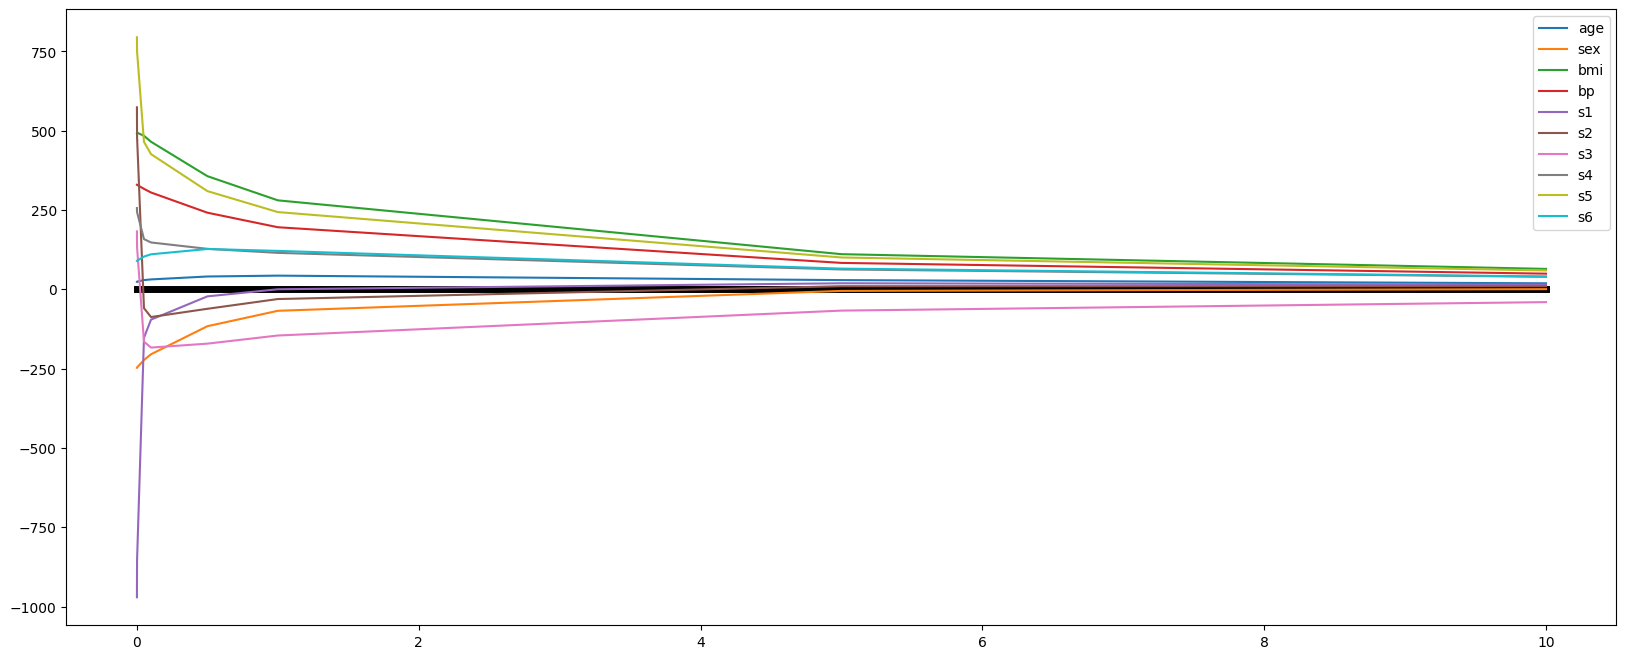

In [99]:
# Adjust the length of alphas to match input_arr
input_arr = input_arr.T  # Ensure same length for plotting

plt.figure(figsize=(20, 8))
plt.plot(alphas, np.zeros(len(alphas)), color='black', linewidth=5)
for i in range(input_arr.shape[0]):
    plt.plot(alphas, input_arr[i], label=data.feature_names[i])
plt.legend()
plt.show()

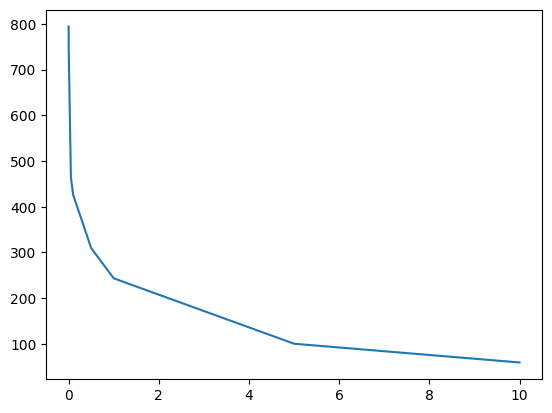

In [101]:
plt.plot(alphas, input_arr[8], label=data.feature_names[8])

#`Impact of bias and var.`

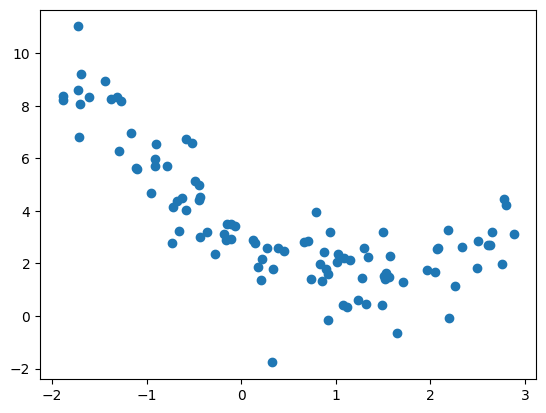

In [22]:
import matplotlib.pyplot as plt
import numpy as np
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=15)
X_train=poly.fit_transform(X_train)
X_test=poly.transform(X_test)

from mlxtend.evaluate import bias_variance_decomp
from sklearn.linear_model import Ridge
alphas=np.linspace(0,30,100)
loss=[]
bias=[]
var=[]
for i in alphas:
  model=Ridge(alpha=i)
  avg_expected_loss,avg_bias,avg_var=bias_variance_decomp(model,X_train,y_train,X_test,y_test,loss='mse',random_seed=123)
  loss.append(avg_expected_loss)
  bias.append(avg_bias)
  var.append(avg_var)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.58574e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.20159e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.19792e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.67284e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

Alpha: 0
R² score: 0.8538
MSE: 0.9739
Cross-validated R² scores: [0.54804628 0.78115186 0.94517086 0.33265036 0.84922864 0.71244046
 0.76400758 0.44828209 0.10708264 0.90392804]
Mean CV R²: 0.6392

Alpha: 0.1
R² score: 0.8500
MSE: 0.9993
Cross-validated R² scores: [0.59754446 0.77667548 0.93220193 0.41229743 0.85463743 0.72326247
 0.78985602 0.5019704  0.44010285 0.91101337]
Mean CV R²: 0.6940



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.67603e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.39602e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.3924e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.4036e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Alpha: 1
R² score: 0.8478
MSE: 1.0139
Cross-validated R² scores: [0.62075491 0.77649501 0.92729106 0.4500758  0.85974444 0.71629482
 0.78906662 0.68796262 0.68060718 0.90855369]
Mean CV R²: 0.7417

Alpha: 10
R² score: 0.8347
MSE: 1.1012
Cross-validated R² scores: [0.59190023 0.73583447 0.91830592 0.50833701 0.86904565 0.68788959
 0.7613955  0.78890753 0.81449638 0.89881509]
Mean CV R²: 0.7575



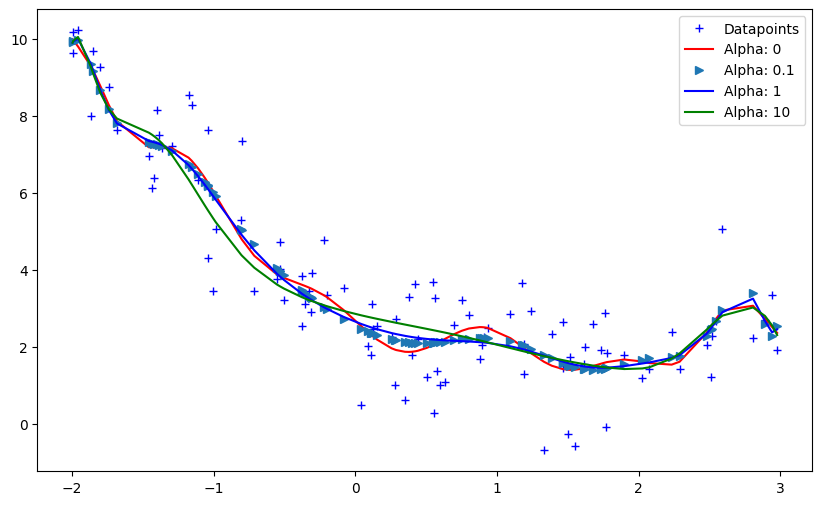

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score

# Function to get predictions from Ridge regression
def get_preds_ridge(x1, x2, alpha):
    polybig_features = PolynomialFeatures(degree=16, include_bias=False)
    std_scaler = StandardScaler()
    polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("ridge_reg", Ridge(alpha=alpha))
    ])
    polynomial_regression.fit(x1, x2)
    return polynomial_regression.predict(x1), polynomial_regression

# Define alphas and colors
alphas = [0, 0.1, 1, 10]
cs = ['r', '>', 'b', 'g']

# Create KFold cross-validator with 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    # Get predictions and model
    preds, model = get_preds_ridge(x1, x2, alpha)
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

    # Compute R² and MSE
    r2 = r2_score(x2, preds)
    mse = mean_squared_error(x2, preds)

    # Cross-validation using KFold
    cv_scores = cross_val_score(model, x1, x2, cv=kf, scoring='r2')

    # Print metrics
    print(f"Alpha: {alpha}")
    print(f"R² score: {r2:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"Cross-validated R² scores: {cv_scores}")
    print(f"Mean CV R²: {cv_scores.mean():.4f}\n")

plt.legend()
plt.show()

Shape of X: (100, 1)
Shape of y: (100,)


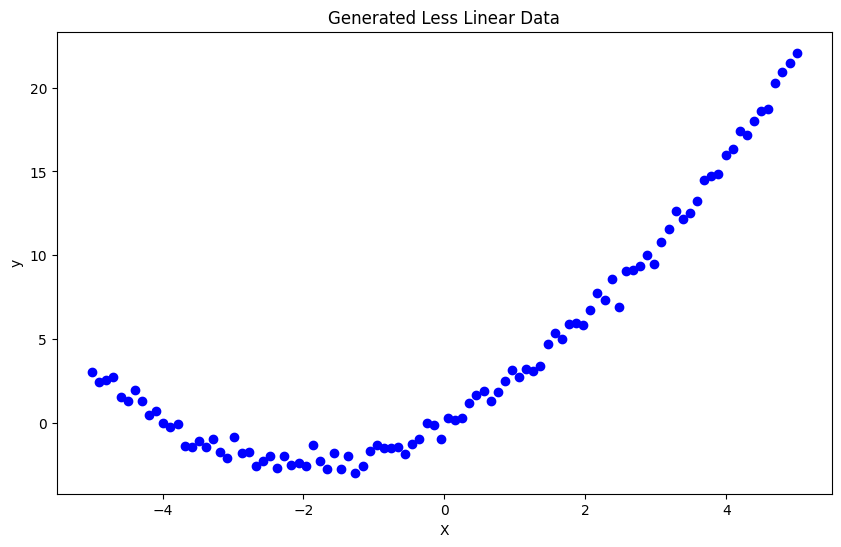

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Generate input features (X)
np.random.seed(42)  # For reproducibility
X = np.linspace(-5, 5, 100).reshape(-1, 1)

# Generate output (y) with a non-linear relationship
# Increase the non-linear terms to make it less linear
y = 2 * X.flatten() + 0.5 * (X**2).flatten() + 0.3 * np.sin(X).flatten() + np.random.normal(0, 0.5, size=X.shape[0])

# Check if shapes are the same
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Plot the less linear data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.title('Generated Less Linear Data')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=45)

In [32]:
X_train[:10]

array([[-0.45454545],
       [-4.09090909],
       [-2.97979798],
       [-3.18181818],
       [ 2.37373737],
       [-3.08080808],
       [-2.47474747],
       [-2.87878788],
       [ 2.07070707],
       [-2.67676768]])

In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=15)
X_train=poly.fit_transform(X_train)
X_test=poly.transform(X_test)


In [34]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.linear_model import Ridge
alphas=np.linspace(0,30,100)
loss=[]
bias=[]
var=[]
for i in alphas:
  model=Ridge(alpha=i)
  avg_expected_loss,avg_bias,avg_var=bias_variance_decomp(model,X_train,y_train,X_test,y_test,loss='mse',random_seed=123)
  loss.append(avg_expected_loss)
  bias.append(avg_bias)
  var.append(avg_var)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.33569e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.94348e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.05355e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.70381e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packag

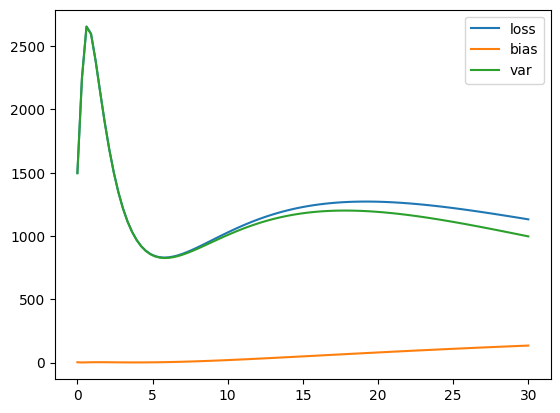

In [35]:
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='bias')
plt.plot(alphas,var,label='var')
# plt.ylim(0,100)
plt.legend()
plt.show()

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=45)

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

poly=PolynomialFeatures(degree=2)
X_train_poly=poly.fit_transform(X_train_scaled)
X_test_poly=poly.transform(X_test_scaled)
# Preprocess the data

# Fit the Ridge model with a higher alpha
model = Ridge(alpha=0.30823992397451433)  # Increase alpha if necessary
model.fit(X_train_poly, y_train)

Ridge(alpha=0.30823992397451433)

In [70]:

import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score
# Set up cross-validation scheme
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(model, X_train_poly, y_train, cv=kfold, scoring='r2')

# test_score = model.score(X_test_poly, y_test)
# # print("Training CV Score (mean R²):", np.mean(cv_scores))
# print("Test R² Score:", test_score)


## Training cv_score
print('training_cv_score', np.mean(cv_scores))


# Set up cross-validation scheme
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_score = cross_val_score(model, X_test_poly, y_test, cv=kfold, scoring='r2')

print('test_cv_score', np.mean(cv_score))

training_cv_score 0.9884850769474218
test_cv_score 0.9410848724478024


In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

poly=PolynomialFeatures(degree=2)
X_train_poly=poly.fit_transform(X_train_scaled)
X_test_poly=poly.transform(X_test_scaled)
# Preprocess the data

# Fit the Ridge model with a higher alpha
model = Ridge(alpha=0.30823992397451433)  # Increase alpha if necessary
model.fit(X_train_poly, y_train)

from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.linear_model import Ridge

# Set up the parameter grid with alpha ranging from a small value to 30
param_grid = {'alpha': np.logspace(-3, 1.48, 10)}  # Log scale up to approximately 30

grid_search = GridSearchCV(Ridge(), param_grid, scoring='r2', cv=kfold)
grid_search.fit(X_train_poly, y_train)

print("Best alpha:", grid_search.best_params_)

Best alpha: {'alpha': 0.30823992397451433}


In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

poly=PolynomialFeatures(degree=2)
X_train_poly=poly.fit_transform(X_train_scaled)
X_test_poly=poly.transform(X_test_scaled)
# Preprocess the data

# Fit the Ridge model with a higher alpha
model = Ridge(alpha=5.35)  # Increase alpha if necessary
model.fit(X_train_poly, y_train)

import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score
# Set up cross-validation scheme
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(model, X_train_poly, y_train, cv=kfold, scoring='r2')

# test_score = model.score(X_test_poly, y_test)
# # print("Training CV Score (mean R²):", np.mean(cv_scores))
# print("Test R² Score:", test_score)


## Training cv_score
print('training_cv_score', np.mean(cv_scores))


# Set up cross-validation scheme
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_score = cross_val_score(model, X_test_poly, y_test, cv=kfold, scoring='r2')

print('test_cv_score', np.mean(cv_score))

training_cv_score 0.9825672704037085
test_cv_score 0.6773575633906109


In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.model_selection import cross_val_score, KFold

# Assume X_train, X_test, y_train, and y_test are already defined

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Transform the data with polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Set up cross-validation scheme
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Loop through alpha values between 5 and 5.6
alpha_values = np.linspace(4.8, 5.6, 100)
results = {}

for i, alpha in enumerate(alpha_values):
    model = Ridge(alpha=alpha)
    model.fit(X_train_poly, y_train)

    # Calculate training CV score
    cv_scores_train = cross_val_score(model, X_train_poly, y_train, cv=kfold, scoring='r2')
    training_cv_score = np.mean(cv_scores_train)

    # Calculate test CV score
    cv_scores_test = cross_val_score(model, X_test_poly, y_test, cv=kfold, scoring='r2')
    test_cv_score = np.mean(cv_scores_test)

    # Store results
    results[i] = {'alpha': alpha, 'training_cv_score': training_cv_score, 'test_cv_score': test_cv_score}

# Print results
for index, result in results.items():
    print(f"Index: {index}, Alpha: {result['alpha']:.4f}, Training CV Score: {result['training_cv_score']:.4f}, Test CV Score: {result['test_cv_score']:.4f}")


Index: 0, Alpha: 4.8000, Training CV Score: 0.9837, Test CV Score: 0.7201
Index: 1, Alpha: 4.8081, Training CV Score: 0.9837, Test CV Score: 0.7194
Index: 2, Alpha: 4.8162, Training CV Score: 0.9837, Test CV Score: 0.7188
Index: 3, Alpha: 4.8242, Training CV Score: 0.9837, Test CV Score: 0.7182
Index: 4, Alpha: 4.8323, Training CV Score: 0.9836, Test CV Score: 0.7176
Index: 5, Alpha: 4.8404, Training CV Score: 0.9836, Test CV Score: 0.7170
Index: 6, Alpha: 4.8485, Training CV Score: 0.9836, Test CV Score: 0.7164
Index: 7, Alpha: 4.8566, Training CV Score: 0.9836, Test CV Score: 0.7158
Index: 8, Alpha: 4.8646, Training CV Score: 0.9836, Test CV Score: 0.7151
Index: 9, Alpha: 4.8727, Training CV Score: 0.9836, Test CV Score: 0.7145
Index: 10, Alpha: 4.8808, Training CV Score: 0.9835, Test CV Score: 0.7139
Index: 11, Alpha: 4.8889, Training CV Score: 0.9835, Test CV Score: 0.7133
Index: 12, Alpha: 4.8970, Training CV Score: 0.9835, Test CV Score: 0.7127
Index: 13, Alpha: 4.9051, Training 

In [74]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.linear_model import Ridge
alphas=np.linspace(0,30,1000)
loss=[]
bias=[]
var=[]
for i in alphas:
  model=Ridge(alpha=i)
  avg_expected_loss,avg_bias,avg_var=bias_variance_decomp(model,X_train_poly,y_train,X_test_poly,y_test,loss='mse',random_seed=123)
  loss.append(avg_expected_loss)
  bias.append(avg_bias)
  var.append(avg_var)

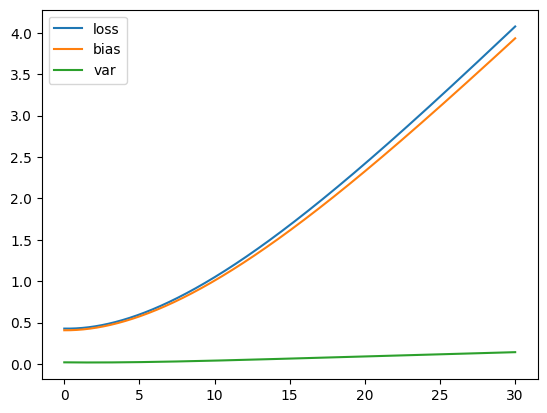

In [75]:
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='bias')
plt.plot(alphas,var,label='var')
# plt.ylim(0,100)
plt.legend()
plt.show()

#`impact of penalty term or regularization  in loss function`

In [ ]:
from sklearn.datasets import make_regression
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

In [ ]:
plt.plot(X,y,'b.')

In [ ]:
from sklearn.linear_model import Ridge,LinearRegression
lr=LinearRegression()
model=lr.fit(X,y)
print(model.coef_)
print(model.intercept_)

In [83]:
def cal_loss(m,alpha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + alpha*m*m

In [84]:
def predict(m):
    return m*X - 2.29

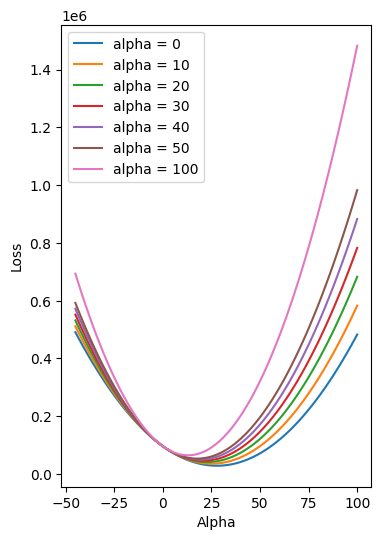

In [85]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(4,6))
for j in [0,10,20,30,40,50,100]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Loss')
plt.show()

#`Lasso reg.`

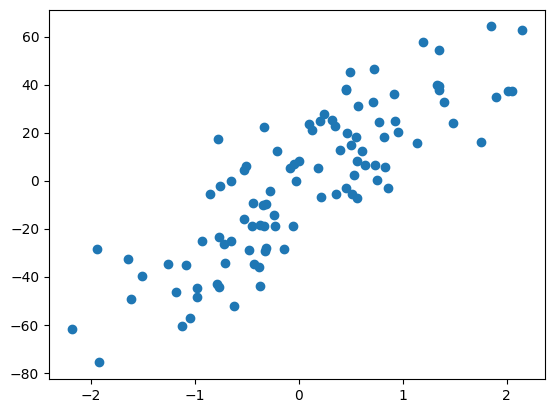

In [13]:
from sklearn.linear_model import Lasso,LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=True,random_state=123)
plt.scatter(X,y)

In [15]:
# Assume X_train, X_test, y_train, and y_test are already defined
# Scale the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
lr=LinearRegression()
model=lr.fit(X_train,y_train)
print(model.coef_)
print(model.intercept_)

[25.55728262]
1.1838024931502262


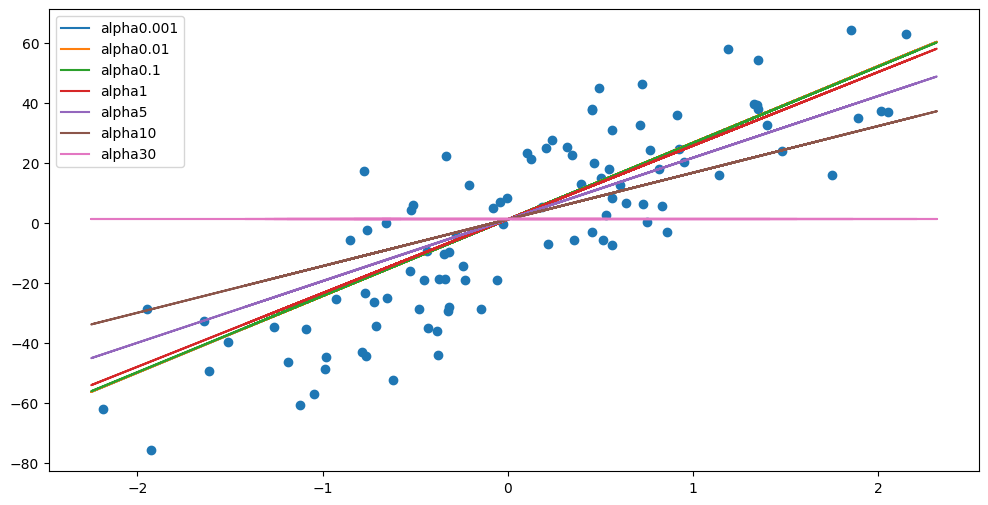

In [21]:
import numpy as np
alphas=[0.001,0.01,0.1,1,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alphas:
  L=Lasso(alpha=i)
  model=L.fit(X_train,y_train)
  plt.plot(X_test,model.predict(X_test),label='alpha{}'.format(i))
  # Set up cross-validation scheme
  # kfold = KFold(n_splits=10, shuffle=True, random_state=42)
  # cv_scores_train = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
  # training_cv_score = np.mean(cv_scores_train)
  # # Calculate test CV score
  # cv_scores_test = cross_val_score(model, X_test, y_test, cv=kfold, scoring='r2')
  # test_cv_score = np.mean(cv_scores_test)
  # print(training_cv_score)
  # print(test_cv_score)
plt.legend()
plt.show()


In [23]:
X_train,X_test,y_train,y_test=train_test_split(x1,x2,test_size=0.2,shuffle=True,random_state=45)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.542e+01, tolerance: 6.135e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.082e+01, tolerance: 6.135e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.748e+02, tolerance: 6.135e

Alpha: 0.01
R² score: 0.8304
MSE: 1.0403

Alpha: 0.1
R² score: 0.8153
MSE: 1.1329

Alpha: 1
R² score: 0.5615
MSE: 2.6899

Alpha: 10
R² score: 0.3647
MSE: 3.8972



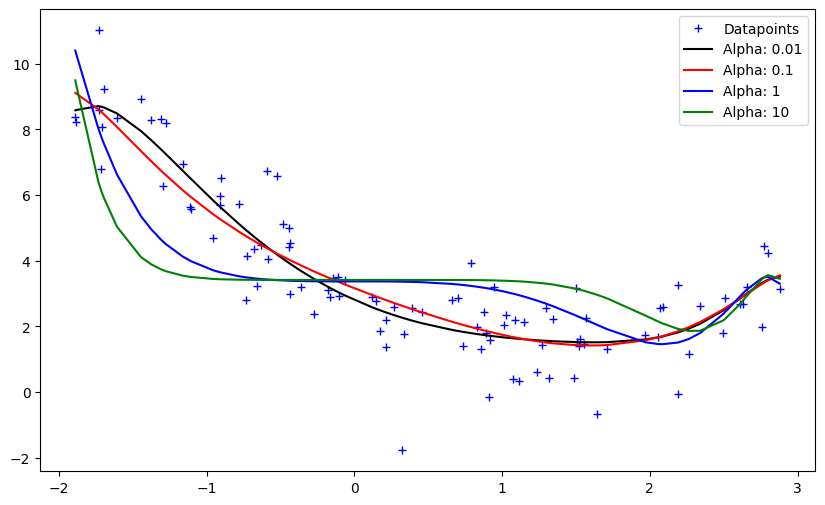

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_squared_error
def get_preds_lasso(x1, x2, alpha):
    # Create a pipeline with polynomial features, scaling, and Ridge regression
    polybig_features = PolynomialFeatures(degree=16, include_bias=False)
    polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("ridge_reg", Lasso(alpha=alpha))
    ])
    # Fit the pipeline to the data
    polynomial_regression.fit(x1, x2)
    # Make predictions
    return polynomial_regression.predict(x1)


# Plotting the results
alphas = [0.01, 0.1, 1, 10]
cs = ['black', 'r', 'b','g']
plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')
for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(x1, x2, alpha)
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))
    r2 = r2_score(x2, preds)
    mse = mean_squared_error(x2, preds)
    print(f"Alpha: {alpha}")
    print(f"R² score: {r2:.4f}")
    print(f"MSE: {mse:.4f}\n")
plt.legend()
plt.show()


#`How are coefficients affects`

In [74]:
from sklearn.datasets import load_diabetes
import pandas as pd

In [75]:
data=load_diabetes()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['Target']=data.target

In [76]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [77]:
X_train,X_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.2,shuffle=True,random_state=45)

In [65]:
coef=[]
r2_scores=[]
for i in [0.01,0.1,1,2,5]:
  L=Lasso(alpha=i)
  model=L.fit(X_train,y_train)
  coef.append(model.coef_.tolist())
  y_pred=model.predict(X_test)
  r2=r2_score(y_test,y_pred)
  r2_scores.append(r2)


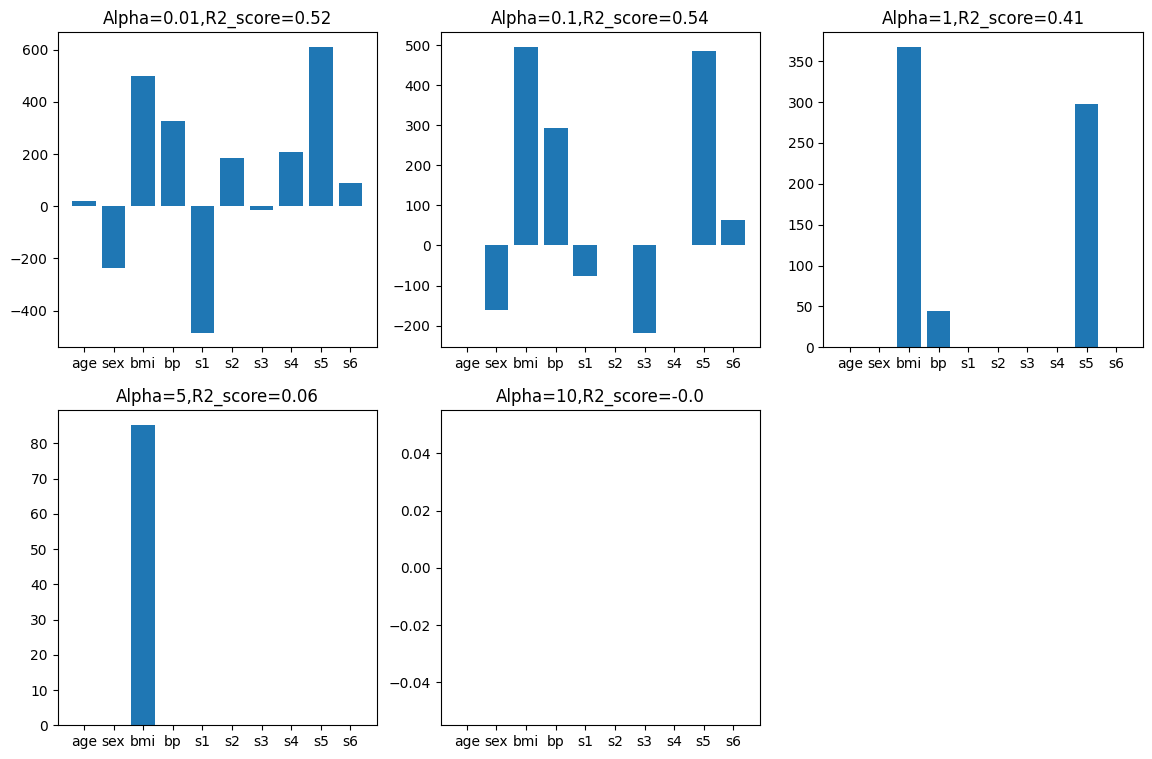

In [66]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(14,9))
plt.subplot(231)
plt.bar(data.feature_names,coef[0])
plt.title('Alpha=0.01,R2_score={}'.format(np.round(r2_scores[0],2)))

plt.subplot(232)
plt.bar(data.feature_names,coef[1])
plt.title('Alpha=0.1,R2_score={}'.format(np.round(r2_scores[1],2)))

plt.subplot(233)
plt.bar(data.feature_names,coef[2])
plt.title('Alpha=1,R2_score={}'.format(np.round(r2_scores[2],2)))

plt.subplot(234)
plt.bar(data.feature_names,coef[3])
plt.title('Alpha=5,R2_score={}'.format(np.round(r2_scores[3],2)))

plt.subplot(235)
plt.bar(data.feature_names,coef[4])
plt.title('Alpha=10,R2_score={}'.format(np.round(r2_scores[4],2)))

plt.show()

In [67]:
L=LinearRegression()
model=L.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [68]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_train = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
training_cv_score = np.mean(cv_scores_train)
# Calculate test CV score
cv_scores_test = cross_val_score(model, X_test, y_test, cv=kfold, scoring='r2')
test_cv_score = np.mean(cv_scores_test)
print(training_cv_score)
print(test_cv_score)

0.4429564072405176
0.30963270210891264


In [69]:
data=load_diabetes()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['Target']=data.target
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X=X.drop(columns=['s4','s2','age'])

In [71]:
X.head()

,sex,bmi,bp,s1,s3,s5,s6
0,0.050680,0.061696,0.021872,-0.044223,-0.043401,0.019907,-0.017646
1,-0.044642,-0.051474,-0.026328,-0.008449,0.074412,-0.068332,-0.092204
2,0.050680,0.044451,-0.005670,-0.045599,-0.032356,0.002861,-0.025930
3,-0.044642,-0.011595,-0.036656,0.012191,-0.036038,0.022688,-0.009362
4,-0.044642,-0.036385,0.021872,0.003935,0.008142,-0.031988,-0.046641


In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=45)

In [73]:
L=LinearRegression()
model=L.fit(X_train,y_train)
y_pred=model.predict(X_test)

kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_train = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
training_cv_score = np.mean(cv_scores_train)
# Calculate test CV score
cv_scores_test = cross_val_score(model, X_test, y_test, cv=kfold, scoring='r2')
test_cv_score = np.mean(cv_scores_test)
print(training_cv_score)
print(test_cv_score)

0.45052973745638775
0.3550436606577425


#`Higher coef_ efected more`

In [102]:
from sklearn.linear_model import Lasso,LinearRegression
alphas=[0.0001,0.001,0.01,0.005,0.1,0.5,1,5,10]
coef=[]
for i in alphas:
  R=Lasso(alpha=i)
  model=R.fit(X_train,y_train)
  coef.append(model.coef_.tolist())

In [103]:
coef

[[23.440054103173228,
  -247.32887580438288,
  492.17978354994955,
  329.32208469996056,
  -963.6855405008884,
  568.0570235798525,
  179.12982888242803,
  254.74232657807153,
  791.6281657487507,
  89.33424754772523],
 [23.308593638657076,
  -246.4416075399292,
  492.8187048568433,
  328.9919691174822,
  -899.7044190124777,
  518.702714773066,
  149.51396931617222,
  244.13072663775208,
  768.3458900736946,
  89.43998314021464],
 [21.438817149052078,
  -235.44591049254157,
  500.1037935385403,
  325.6077150269058,
  -485.3540328251512,
  183.6327458102922,
  -14.801200430206926,
  206.90988659615965,
  612.0636940255255,
  89.27416314758743],
 [22.723479152009837,
  -242.49980635608597,
  495.6532862194248,
  327.5248010088203,
  -615.6788779882453,
  299.6155276950574,
  18.03108640231551,
  197.00416379607734,
  664.9952230713524,
  89.9090418649001],
 [0.0,
  -160.24016407140263,
  496.0802117598307,
  292.39327986968107,
  -75.5811368116942,
  -0.0,
  -218.17601808237592,
  0.0,
 

In [104]:
input_arr=np.array(coef)
coef_df=pd.DataFrame(input_arr,columns=data.feature_names)
coef_df['alpha_values']=alphas
coef_df=coef_df.set_index('alpha_values')
coef_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha_values,,,,,,,,,,
0.0001,23.440054,-247.328876,492.179784,329.322085,-963.685541,568.057024,179.129829,254.742327,791.628166,89.334248
0.0010,23.308594,-246.441608,492.818705,328.991969,-899.704419,518.702715,149.513969,244.130727,768.345890,89.439983
0.0100,21.438817,-235.445910,500.103794,325.607715,-485.354033,183.632746,-14.801200,206.909887,612.063694,89.274163
0.0050,22.723479,-242.499806,495.653286,327.524801,-615.678878,299.615528,18.031086,197.004164,664.995223,89.909042
0.1000,0.000000,-160.240164,496.080212,292.393280,-75.581137,-0.000000,-218.176018,0.000000,485.145552,64.601143
0.5000,0.000000,-0.000000,460.202756,165.812040,-0.000000,-0.000000,-70.742176,0.000000,402.535752,0.000000
1.0000,0.000000,-0.000000,366.943583,44.323509,0.000000,0.000000,-0.000000,0.000000,297.747185,0.000000
5.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
10.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


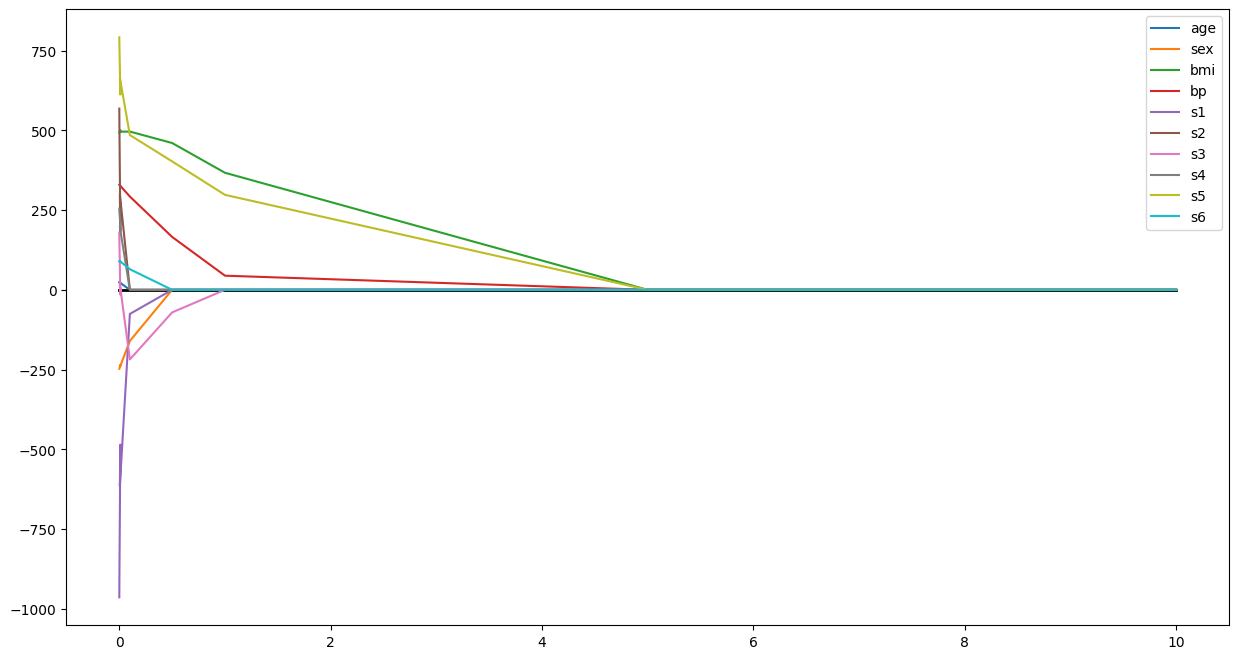

In [105]:

input_arr=np.array(coef).T
plt.figure(figsize=(15,8))
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=2)
for i in range(input_arr.shape[0]):
  plt.plot(alphas,input_arr[i],label=data.feature_names[i])
plt.legend()
plt.show()

#`bais var trade off in lasso`

In [120]:
import matplotlib.pyplot as plt
import numpy as np
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

# plt.scatter(x1, x2)
# plt.show()

X_train,X_test,y_train,y_test=train_test_split(x1,x2.ravel(),test_size=0.2,random_state=2)

from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=10)
X_train=poly.fit_transform(X_train)
X_test=poly.transform(X_test)

from mlxtend.evaluate import bias_variance_decomp
from sklearn.linear_model import Ridge
alphas=np.linspace(0,30,100)
loss=[]
bias=[]
var=[]
for i in alphas:
  model=Lasso(alpha=i)
  avg_expected_loss,avg_bias,avg_var=bias_variance_decomp(model,X_train,y_train,X_test,y_test,loss='mse',random_seed=123)
  loss.append(avg_expected_loss)
  bias.append(avg_bias)
  var.append(avg_var)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.516e+01, tolerance: 4.706e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.095e+01, tolerance: 5.179e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

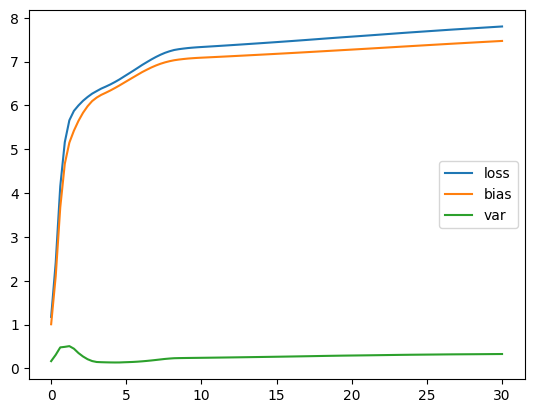

In [118]:
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='bias')
plt.plot(alphas,var,label='var')
plt.legend()
plt.show()

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.datasets import load_diabetes
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# from sklearn.linear_model import Lasso
# from mlxtend.evaluate import bias_variance_decomp

# # Load the diabetes dataset
# diabetes = load_diabetes()
# X, y = diabetes.data, diabetes.target

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# # Optionally, you can apply polynomial feature transformation
# degree = 10  # You can change the degree to 2 or higher if you want a more complex model
# poly = PolynomialFeatures(degree=degree)
# X_train = poly.fit_transform(X_train)
# X_test = poly.transform(X_test)

# # Standardize the features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Lasso regression for bias-variance decomposition
# alphas = np.linspace(0.0001, 30, 100)
# loss = []
# bias = []
# var = []

# for i in alphas:
#     model = Lasso(alpha=i, max_iter=100000)
#     avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
#         model, X_train, y_train, X_test, y_test, loss='mse', random_seed=123
#     )
#     loss.append(avg_expected_loss)
#     bias.append(avg_bias)
#     var.append(avg_var)

# # Plot the results
# plt.figure(figsize=(12, 6))
# plt.plot(alphas, loss, label='Loss', color='red')
# plt.plot(alphas, bias, label='Bias', color='blue')
# plt.plot(alphas, var, label='Variance', color='green')
# plt.xlabel('Alpha (Lasso Regularization)')
# plt.ylabel('Score')
# plt.title('Bias-Variance Tradeoff with Lasso Regression on Diabetes Dataset')
# plt.legend()
# plt.show()


In [ ]:
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='bias')
plt.plot(alphas,var,label='var')
plt.legend()
plt.show()

#`Effects of regularization in loss function`

In [1]:
from sklearn.datasets import make_regression
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

from sklearn.linear_model import Ridge,LinearRegression
lr=LinearRegression()
model=lr.fit(X,y)
print(model.coef_)
print(model.intercept_)

[27.82809103]
-2.29474455867698


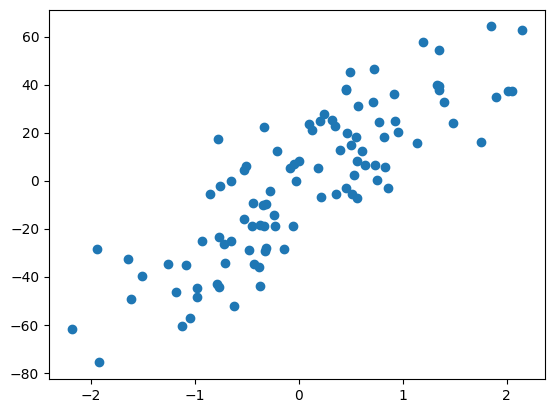

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [7]:
import numpy as np
def cal_loss(m,alpha):
  return np.sum((y-m*X.ravel() +2.29474455867698)**2) + alpha * abs(m)

In [8]:
def predict(m):
  return m*X-2.29

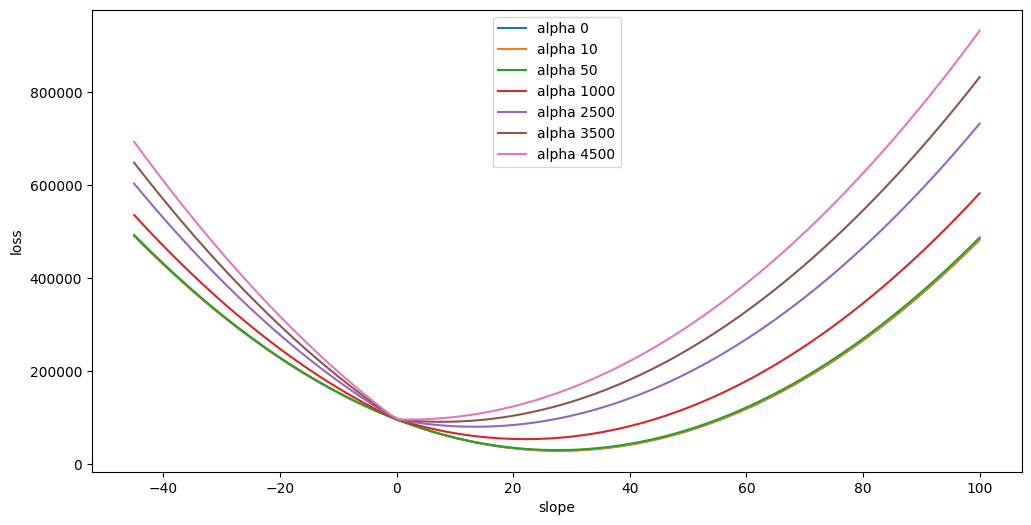

In [13]:
m=np.linspace(-45,100,100)
plt.figure(figsize=(12,6))
for j in [0,10,50,1000,2500,3500,4500]:
  loss=[]
  for i in range(m.shape[0]):
    loss_i=cal_loss(m[i],j)
    loss.append(loss_i)
  plt.plot(m,loss,label='alpha {}'.format(j))
plt.legend()
plt.xlabel('slope')
plt.ylabel('loss')
plt.show()

In [14]:
np.linspace(-45,100,100)

array([-45.        , -43.53535354, -42.07070707, -40.60606061,
       -39.14141414, -37.67676768, -36.21212121, -34.74747475,
       -33.28282828, -31.81818182, -30.35353535, -28.88888889,
       -27.42424242, -25.95959596, -24.49494949, -23.03030303,
       -21.56565657, -20.1010101 , -18.63636364, -17.17171717,
       -15.70707071, -14.24242424, -12.77777778, -11.31313131,
        -9.84848485,  -8.38383838,  -6.91919192,  -5.45454545,
        -3.98989899,  -2.52525253,  -1.06060606,   0.4040404 ,
         1.86868687,   3.33333333,   4.7979798 ,   6.26262626,
         7.72727273,   9.19191919,  10.65656566,  12.12121212,
        13.58585859,  15.05050505,  16.51515152,  17.97979798,
        19.44444444,  20.90909091,  22.37373737,  23.83838384,
        25.3030303 ,  26.76767677,  28.23232323,  29.6969697 ,
        31.16161616,  32.62626263,  34.09090909,  35.55555556,
        37.02020202,  38.48484848,  39.94949495,  41.41414141,
        42.87878788,  44.34343434,  45.80808081,  47.27